In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("evilspirit05/english-fake-news-dataset")
print("Path to dataset files:", path)
import shutil
shutil.copytree(path, '../data/english', dirs_exist_ok=True)

Path to dataset files: /Users/dominikakokoryk/.cache/kagglehub/datasets/evilspirit05/english-fake-news-dataset/versions/4


'../data/english'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_final = pd.read_csv("../data/english/final_en.csv")
df = pd.read_csv('../data/english/enclean_fake_news.csv')

#### enclean_fake_news.csv

In [5]:
df.head()

,label,text
0,1,wow huckabee ask nancy pelosi if shes racist o...
1,1,wikileaks why be the clinton scooby van fit wi...
2,1,thai government take action against monk over ...
3,1,responsible gun owner who have never fire one ...
4,1,stark und schön zugleich stark und schön zugle...


In [6]:
df.shape

(11276, 2)

#### final_en.csv

In [7]:
df_final.head()

,title,text,lebel
0,Trump backs off praise of Russia's Putin after...,"HENDERSON, Nev. (Reuters) - U.S. Republican pr...",1
1,Trump's funding request for U.S. border wall h...,WASHINGTON (Reuters) - President Donald Trump’...,1
2,"As Votes For Trump Went Up, Canada’s Immigrat...","Well, sad to say, it s a sure chance the next ...",0
3,"U.S. Navy, shipbuilders ready for Trump's expa...","SIMI VALLEY, Calif. (Reuters) - The U.S. arms ...",1
4,"Trump defends DACA move, urges Congress to ena...",WASHINGTON (Reuters) - President Donald Trump ...,1


In [8]:
df_final.shape

(10000, 3)

In [9]:
df = df_final
df.isna().sum()

title    0
text     0
lebel    0
dtype: int64

In [10]:
df.dtypes

title    object
text     object
lebel     int64
dtype: object

In [11]:
set(df['lebel'].values)

{0, 1}

In [12]:
df_eng = df.rename(columns={'lebel': 'fake'})
df_eng['fake'] = (df_eng['fake'] + 1) % 2
df_eng.head()
df_eng

,title,text,fake
0,Trump backs off praise of Russia's Putin after...,"HENDERSON, Nev. (Reuters) - U.S. Republican pr...",0
1,Trump's funding request for U.S. border wall h...,WASHINGTON (Reuters) - President Donald Trump’...,0
2,"As Votes For Trump Went Up, Canada’s Immigrat...","Well, sad to say, it s a sure chance the next ...",1
3,"U.S. Navy, shipbuilders ready for Trump's expa...","SIMI VALLEY, Calif. (Reuters) - The U.S. arms ...",0
4,"Trump defends DACA move, urges Congress to ena...",WASHINGTON (Reuters) - President Donald Trump ...,0
...,...,...,...
9995,ESTABLISHMENT GOP END TIMES? Why Republican Ca...,"In the real world, if your boss is damaging yo...",1
9996,Republican tax fight complicates plan to pass ...,WASHINGTON (Reuters) - A budget plan crucial t...,0
9997,Nigeria offers to meet militants after ceasefi...,ABUJA (Reuters) - The minister for Nigeria s o...,0
9998,Mike Pence: Trump Is Probably Going To Tortur...,"On Face The Nation, Mike Pence showed exactly ...",1


In [13]:
df_eng.isna().sum()

title    0
text     0
fake     0
dtype: int64

In [14]:
df_eng['combined_text'] = (
    df_eng['title'].fillna('').astype(str).str.strip()
    + ' '
    + df_eng['text'].fillna('').astype(str).str.strip()
).str.replace(r'\s+', ' ', regex=True).str.strip()

In [15]:
df_eng['combined_text']

0       Trump backs off praise of Russia's Putin after...
1       Trump's funding request for U.S. border wall h...
2       As Votes For Trump Went Up, Canada’s Immigrati...
3       U.S. Navy, shipbuilders ready for Trump's expa...
4       Trump defends DACA move, urges Congress to ena...
                              ...                        
9995    ESTABLISHMENT GOP END TIMES? Why Republican Ca...
9996    Republican tax fight complicates plan to pass ...
9997    Nigeria offers to meet militants after ceasefi...
9998    Mike Pence: Trump Is Probably Going To Torture...
9999    CNN FIRES BLACK DEM Party Chair: New Wikileaks...
Name: combined_text, Length: 10000, dtype: object

In [16]:
df_eng['combined_text'].isna().sum()

0

In [17]:
df_eng[df_eng['combined_text'] == ""]

,title,text,fake,combined_text


In [18]:
df_eng

,title,text,fake,combined_text
0,Trump backs off praise of Russia's Putin after...,"HENDERSON, Nev. (Reuters) - U.S. Republican pr...",0,Trump backs off praise of Russia's Putin after...
1,Trump's funding request for U.S. border wall h...,WASHINGTON (Reuters) - President Donald Trump’...,0,Trump's funding request for U.S. border wall h...
2,"As Votes For Trump Went Up, Canada’s Immigrat...","Well, sad to say, it s a sure chance the next ...",1,"As Votes For Trump Went Up, Canada’s Immigrati..."
3,"U.S. Navy, shipbuilders ready for Trump's expa...","SIMI VALLEY, Calif. (Reuters) - The U.S. arms ...",0,"U.S. Navy, shipbuilders ready for Trump's expa..."
4,"Trump defends DACA move, urges Congress to ena...",WASHINGTON (Reuters) - President Donald Trump ...,0,"Trump defends DACA move, urges Congress to ena..."
...,...,...,...,...
9995,ESTABLISHMENT GOP END TIMES? Why Republican Ca...,"In the real world, if your boss is damaging yo...",1,ESTABLISHMENT GOP END TIMES? Why Republican Ca...
9996,Republican tax fight complicates plan to pass ...,WASHINGTON (Reuters) - A budget plan crucial t...,0,Republican tax fight complicates plan to pass ...
9997,Nigeria offers to meet militants after ceasefi...,ABUJA (Reuters) - The minister for Nigeria s o...,0,Nigeria offers to meet militants after ceasefi...
9998,Mike Pence: Trump Is Probably Going To Tortur...,"On Face The Nation, Mike Pence showed exactly ...",1,Mike Pence: Trump Is Probably Going To Torture...


In [19]:
df_eng['text'] = df_eng['combined_text']

In [20]:
df_short = df_eng[['text', 'fake']]
df_short.shape

(10000, 2)

In [21]:
df_short

,text,fake
0,Trump backs off praise of Russia's Putin after...,0
1,Trump's funding request for U.S. border wall h...,0
2,"As Votes For Trump Went Up, Canada’s Immigrati...",1
3,"U.S. Navy, shipbuilders ready for Trump's expa...",0
4,"Trump defends DACA move, urges Congress to ena...",0
...,...,...
9995,ESTABLISHMENT GOP END TIMES? Why Republican Ca...,1
9996,Republican tax fight complicates plan to pass ...,0
9997,Nigeria offers to meet militants after ceasefi...,0
9998,Mike Pence: Trump Is Probably Going To Torture...,1


In [22]:
df_short = df_short.drop_duplicates(ignore_index=True)

In [23]:
df_short

,text,fake
0,Trump backs off praise of Russia's Putin after...,0
1,Trump's funding request for U.S. border wall h...,0
2,"As Votes For Trump Went Up, Canada’s Immigrati...",1
3,"U.S. Navy, shipbuilders ready for Trump's expa...",0
4,"Trump defends DACA move, urges Congress to ena...",0
...,...,...
9724,ESTABLISHMENT GOP END TIMES? Why Republican Ca...,1
9725,Republican tax fight complicates plan to pass ...,0
9726,Nigeria offers to meet militants after ceasefi...,0
9727,Mike Pence: Trump Is Probably Going To Torture...,1


In [24]:
df_short.to_csv('../../data_for_modeling/English_fake_for_modeling.csv', index=False)

In [25]:
df_short

,text,fake
0,Trump backs off praise of Russia's Putin after...,0
1,Trump's funding request for U.S. border wall h...,0
2,"As Votes For Trump Went Up, Canada’s Immigrati...",1
3,"U.S. Navy, shipbuilders ready for Trump's expa...",0
4,"Trump defends DACA move, urges Congress to ena...",0
...,...,...
9724,ESTABLISHMENT GOP END TIMES? Why Republican Ca...,1
9725,Republican tax fight complicates plan to pass ...,0
9726,Nigeria offers to meet militants after ceasefi...,0
9727,Mike Pence: Trump Is Probably Going To Torture...,1


## EDA

In [32]:
import ninja_utils

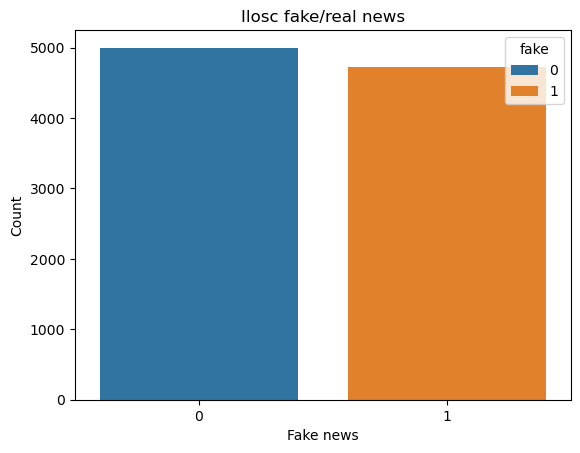

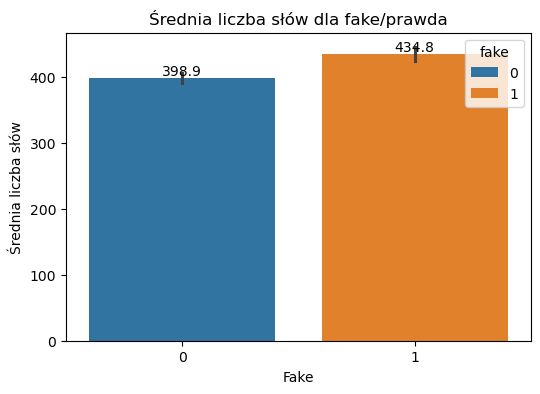

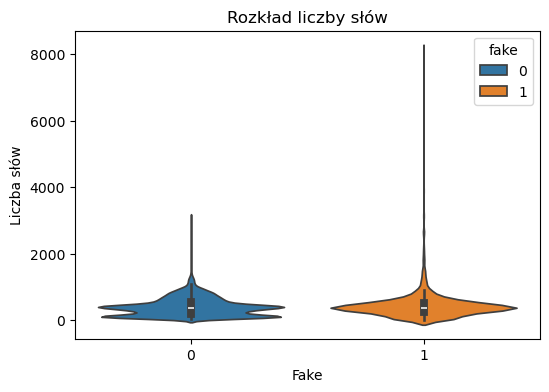

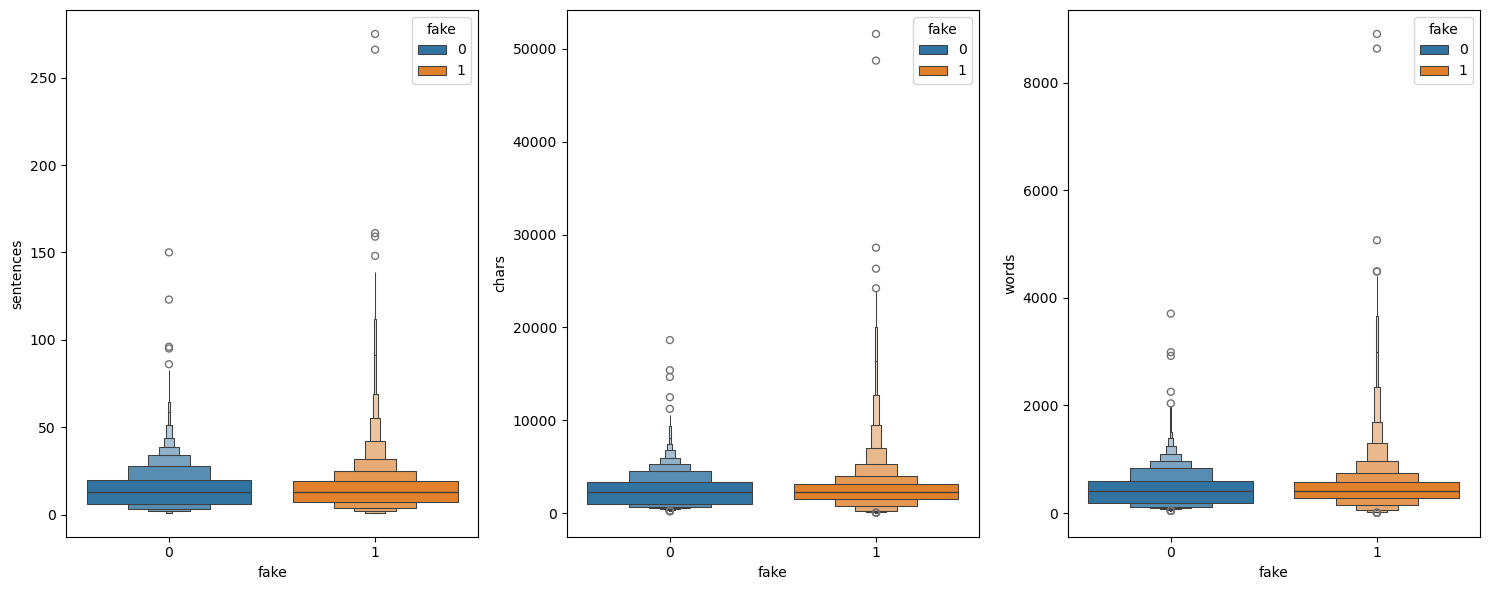

In [33]:
ninja_utils.plot_plots_dataset(df_short)